# **ML-AI4Econ Course**

We first download the different packages needed for this part of the course:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

We also set a random seed for reproducible results:

In [2]:
np.random.seed(24)

### Statistical Learning Theory

After doing a little statistics refresher, let us just practically understand the implications of statistical learninng theory for ML\&AI. First of all, we will simulate a sinusoidal function, and we will add some noise to the observations, so that we have a kind of noisy dataset that has an underlying sinusoidal function in it.

In [3]:
n_samples = 100
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y_true = np.sin(X).ravel()
noise = np.random.normal(0, 0.15, size=y_true.shape)
y_observed = y_true + noise

X_train, X_test, y_train, y_test = train_test_split(X, y_observed, test_size=0.2, random_state=42)

We consider to fit them by through a polinomial function with different degrees. As you know, a higher degree makes our function more complex because it allows for more "twists".

In [4]:
degrees = [1, 3, 10]
models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for degree in degrees]

Now, we fit and visualize the different models for different complexity levels. We compare the training and the test errors for each fit.

Model with degree 1:
Empirical Risk (Training MSE): 0.1635
True Risk (Test MSE): 0.2030

Model with degree 3:
Empirical Risk (Training MSE): 0.0278
True Risk (Test MSE): 0.0225

Model with degree 10:
Empirical Risk (Training MSE): 0.0235
True Risk (Test MSE): 0.0191



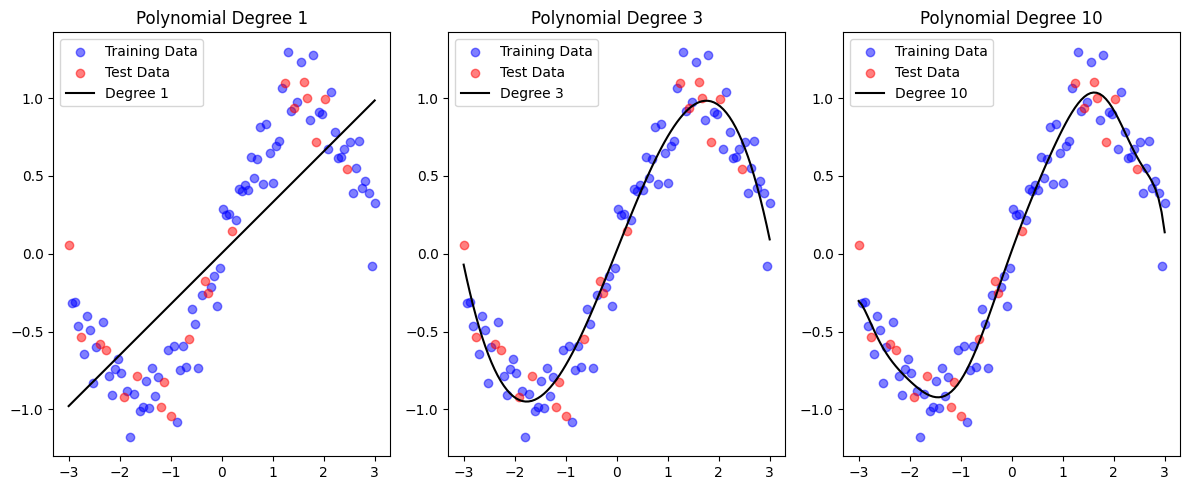

In [5]:
plt.figure(figsize=(12, 5))
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    print(f"Model with degree {degrees[i]}:")
    print(f"Empirical Risk (Training MSE): {train_error:.4f}")
    print(f"True Risk (Test MSE): {test_error:.4f}\n")
    
    plt.subplot(1, len(degrees), i+1)
    plt.scatter(X_train, y_train, label="Training Data", color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, label="Test Data", color='red', alpha=0.5)
    
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)
    plt.plot(X_range, y_range_pred, label=f"Degree {degrees[i]}", color='black')
    plt.legend()
    plt.title(f"Polynomial Degree {degrees[i]}")

plt.tight_layout()
plt.show()

What could we observe?

- Lower-degree models (e.g., linear) have high bias but lower variance, leading to underfitting.
- Higher-degree models (e.g., degree 10) fit training data well but generalize poorly due to overfitting.
- The best model balances empirical risk and true risk, minimizing generalization error.

We will talk more about this "bias-variance trade-off" in the future, as it is very important.

This is not just constrained to regression, but to classification as well. We first use a dataset from Scikit-learn package:

In [6]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then, we consider different complexity levels:

In [7]:
degrees = [1, 3, 6]
models = [make_pipeline(PolynomialFeatures(degree), StandardScaler(), LogisticRegression()) for degree in degrees]

Finally, we do the same exercise as before:

Model with polynomial degree 1:
Training Accuracy (Empirical Risk): 0.8708
Test Accuracy (True Risk): 0.9000

Model with polynomial degree 3:
Training Accuracy (Empirical Risk): 0.9042
Test Accuracy (True Risk): 0.9000

Model with polynomial degree 6:
Training Accuracy (Empirical Risk): 0.9292
Test Accuracy (True Risk): 0.9167



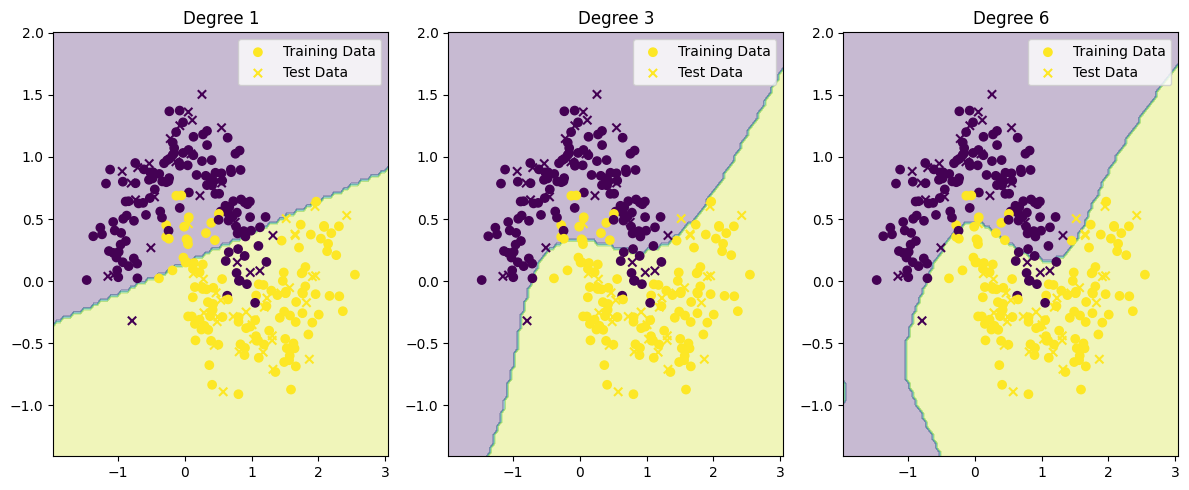

In [8]:

plt.figure(figsize=(12, 5))
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Model with polynomial degree {degrees[i]}:")
    print(f"Training Accuracy (Empirical Risk): {train_accuracy:.4f}")
    print(f"Test Accuracy (True Risk): {test_accuracy:.4f}\n")

    plt.subplot(1, len(degrees), i+1)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100),
                         np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')
    plt.title(f"Degree {degrees[i]}")
    plt.legend()

plt.tight_layout()
plt.show()


In this case we observe that:

- Lower-degree models (e.g., linear) may underfit the data.
- Higher-degree models (e.g., degree 6) fit training data well and, in this case, also generalize well.

Take into account these are just examples, and real-life applications are much more complex and hence effects of the complexity of the model can be more or less obvious depending on the situation and the modeller choices, and the can also have from insignificant to history-changing consequences for our applications.